## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [6]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [7]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [8]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

### 데이터 추출하기

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [41]:
# 국가 그룹 설정
country_groups = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [49]:
# 국가 그룹별 데이터 필터링
df_filtered = df[df["Country"].isin(country_groups)]
df_filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


In [67]:
# 분석에 필요한 변수 선택
df_filtered = df_filtered[['Country', 'Quantity', 'UnitPrice', 'TotalPrice']]
df_filtered

,Country,Quantity,UnitPrice,TotalPrice
9783,Japan,6,2.55,15.30
9784,Japan,12,0.42,5.04
9785,Japan,12,0.42,5.04
9786,Japan,12,0.42,5.04
9787,Japan,12,0.42,5.04
...,...,...,...,...
524432,USA,16,1.25,20.00
524433,USA,16,1.25,20.00
524434,USA,72,0.65,46.80
524435,USA,12,2.95,35.40


### 상관계수 구하기

In [69]:
#국가별 상관계수
corr_country = df_filtered.groupby('Country').corr()
corr_country

Quantity  UnitPrice  TotalPrice
Country                                              
Canada    Quantity    1.000000  -0.041505    0.598980
          UnitPrice  -0.041505   1.000000    0.704830
          TotalPrice  0.598980   0.704830    1.000000
Hong Kong Quantity    1.000000  -0.091419   -0.018107
          UnitPrice  -0.091419   1.000000    0.989665
          TotalPrice -0.018107   0.989665    1.000000
Japan     Quantity    1.000000  -0.150107    0.836360
          UnitPrice  -0.150107   1.000000    0.112715
          TotalPrice  0.836360   0.112715    1.000000
Lebanon   Quantity    1.000000  -0.499397    0.089108
          UnitPrice  -0.499397   1.000000    0.691339
          TotalPrice  0.089108   0.691339    1.000000
Singapore Quantity    1.000000  -0.123607   -0.091524
          UnitPrice  -0.123607   1.000000    0.996572
          TotalPrice -0.091524   0.996572    1.000000
USA       Quantity    1.000000  -0.443742    0.492460
          UnitPrice  -0.443742   1.000000    0.253409
          TotalPrice  0.492460   0.253409    1.000000

<Axes: ylabel='Country-None'>

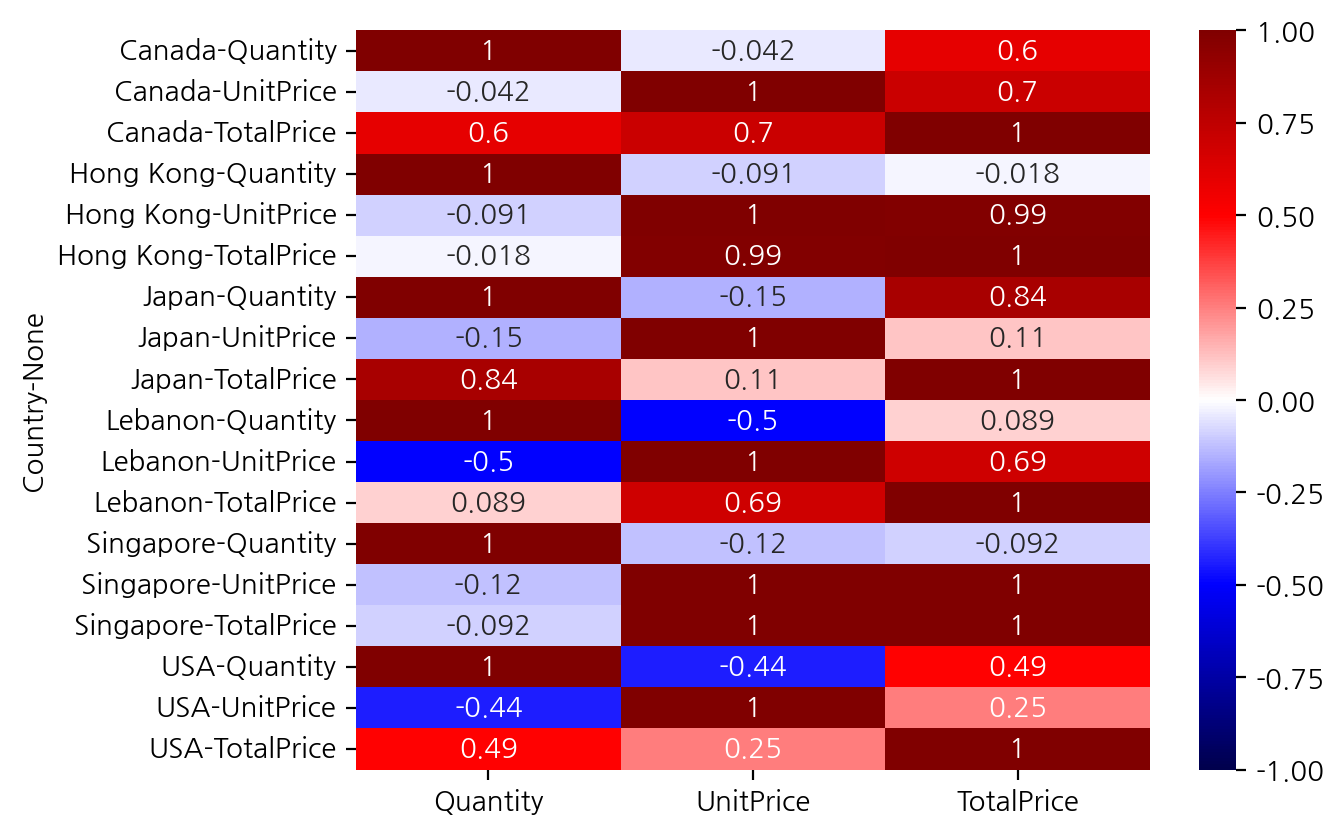

In [88]:
sns.heatmap(corr_country, annot=True, cmap="seismic", vmin=-1, vmax=1)

In [74]:
#전체 변수의 상관 계수 구하기
corr = df.corr()
corr

<ipython-input-74-9d40c6a02fda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Quantity,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
Quantity,1.000000,-0.003773,-0.006232,-0.002335,0.907338
UnitPrice,-0.003773,1.000000,-0.010873,0.000251,0.137404
CustomerID,-0.006232,-0.010873,1.000000,0.030439,-0.004109
InvoiceMonth,-0.002335,0.000251,0.030439,1.000000,0.000316
TotalPrice,0.907338,0.137404,-0.004109,0.000316,1.000000


<Axes: >

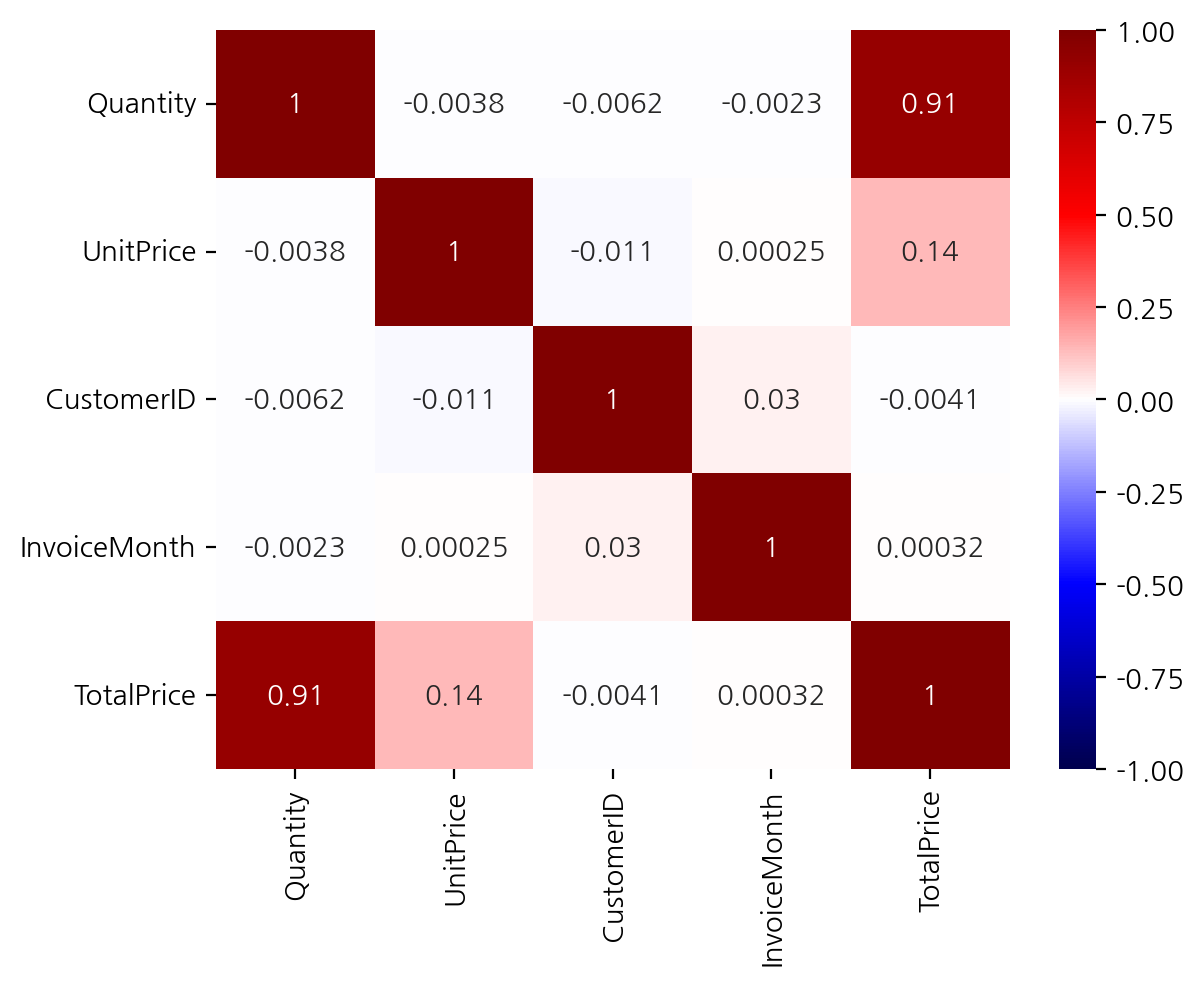

In [89]:
sns.heatmap(corr, annot=True, cmap="seismic", vmin=-1, vmax=1)

### lmplot을 사용하여 심슨의 역설 증명

In [91]:
df_filtered

,Country,Quantity,UnitPrice,TotalPrice
9783,Japan,6,2.55,15.30
9784,Japan,12,0.42,5.04
9785,Japan,12,0.42,5.04
9786,Japan,12,0.42,5.04
9787,Japan,12,0.42,5.04
...,...,...,...,...
524432,USA,16,1.25,20.00
524433,USA,16,1.25,20.00
524434,USA,72,0.65,46.80
524435,USA,12,2.95,35.40


In [99]:
df_filtered_means = df_filtered.groupby('Country').mean()

In [22]:
total_price_mean = df['TotalPrice'].mean()
total_price_mean

20.121871451639677

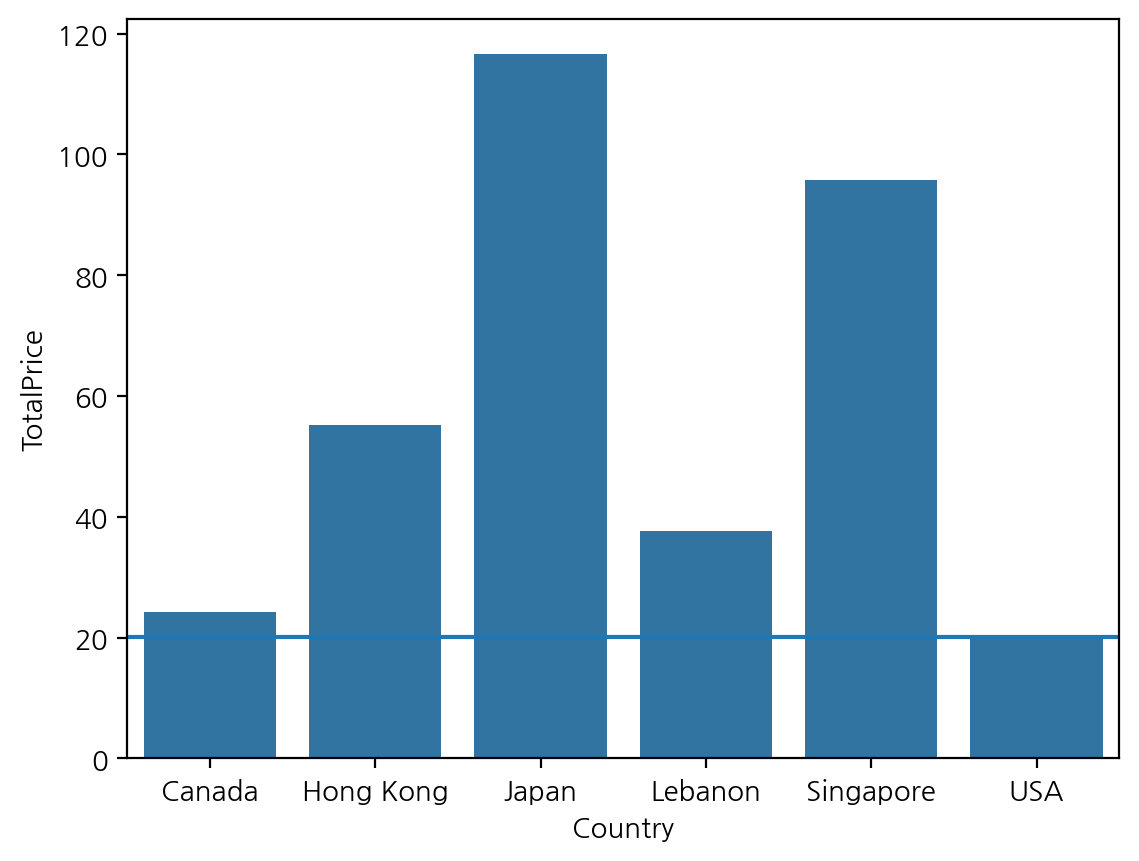

In [100]:
sns.barplot(data=df_filtered_means, x='Country', y='TotalPrice')
plt.axhline(total_price_mean);

<Axes: xlabel='TotalPrice', ylabel='UnitPrice'>

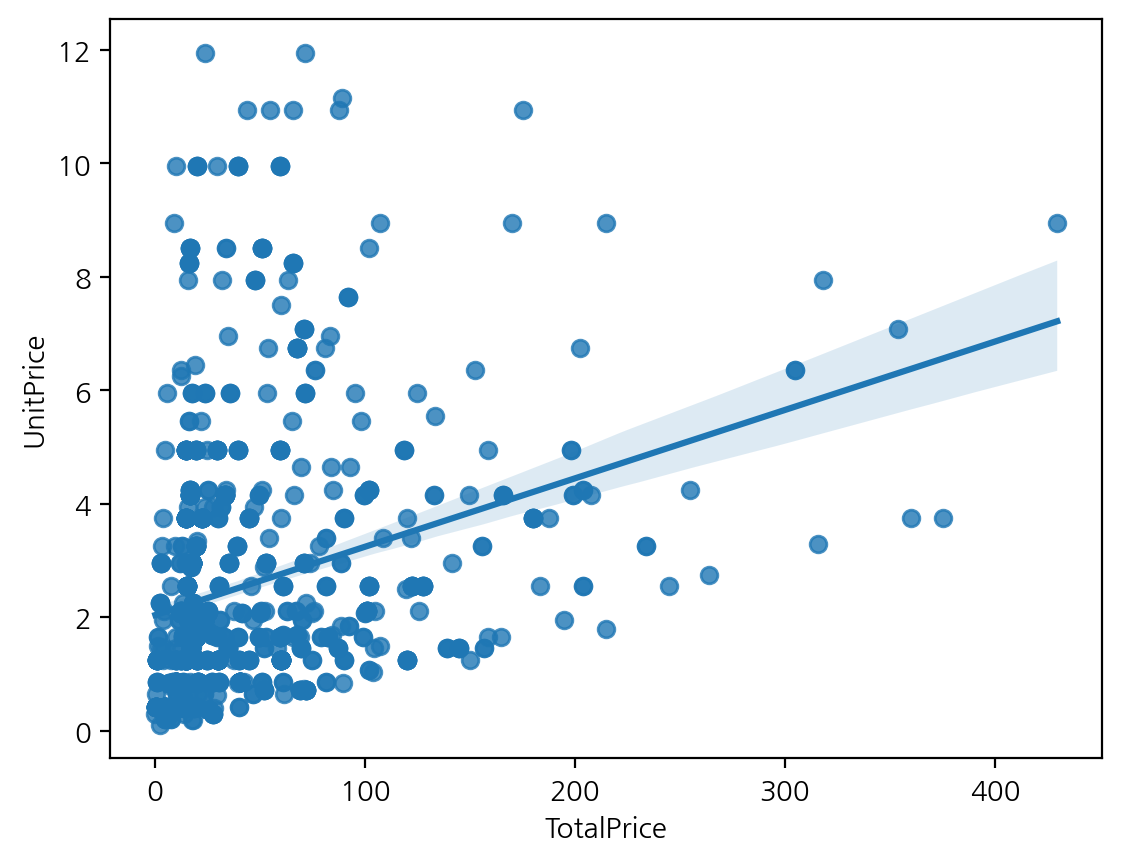

In [149]:
# 전체 변수 시각화
sns.regplot(data=df_filtered, x="TotalPrice", y="UnitPrice")

In [104]:
#이상치 제거 필요
df_filtered.sort_values(by='UnitPrice', ascending=False).head()

,Country,Quantity,UnitPrice,TotalPrice
406406,Singapore,1,3949.32,3949.32
347948,Hong Kong,1,2653.95,2653.95
119632,Hong Kong,1,2583.76,2583.76
144826,Singapore,1,2382.92,2382.92
406407,Singapore,1,2118.74,2118.74


In [126]:
df_filtered

,Country,Quantity,UnitPrice,TotalPrice
9783,Japan,6,2.55,15.30
9784,Japan,12,0.42,5.04
9785,Japan,12,0.42,5.04
9786,Japan,12,0.42,5.04
9787,Japan,12,0.42,5.04
...,...,...,...,...
524432,USA,16,1.25,20.00
524433,USA,16,1.25,20.00
524434,USA,72,0.65,46.80
524435,USA,12,2.95,35.40


In [141]:
# 평균과 표준편차 계산
mean = df_filtered['UnitPrice'].mean()
std = df_filtered['UnitPrice'].std()

# Z-스코어 계산
z_scores = (df_filtered['UnitPrice'] - mean) / std

# 절댓값 3 이상인 이상치 제거
threshold = 4
outliers = df_filtered[np.abs(z_scores) > threshold]

df_filtered = df_filtered.drop(outliers.index, axis=0)


<Axes: xlabel='UnitPrice', ylabel='TotalPrice'>

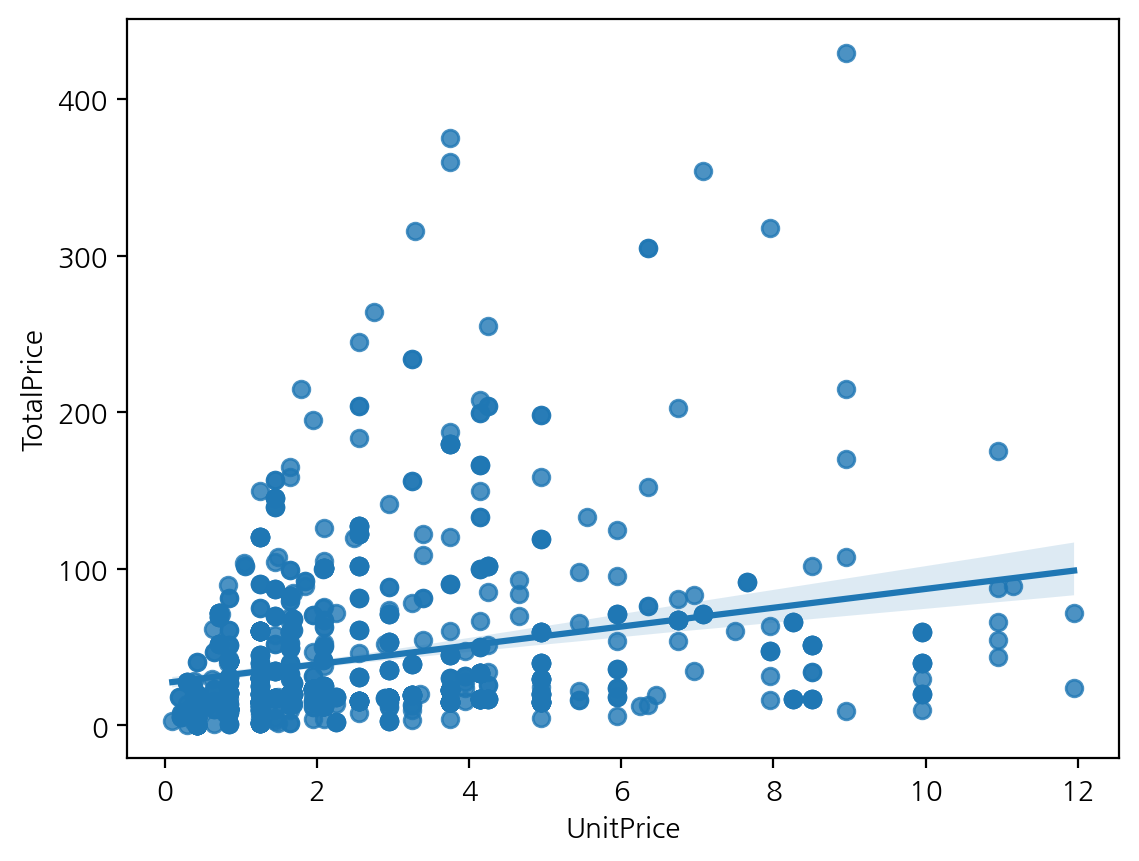

In [161]:
# 전체 변수 시각화2
sns.regplot(data=df_filtered, x="UnitPrice", y="TotalPrice")

<Axes: xlabel='UnitPrice', ylabel='TotalPrice'>

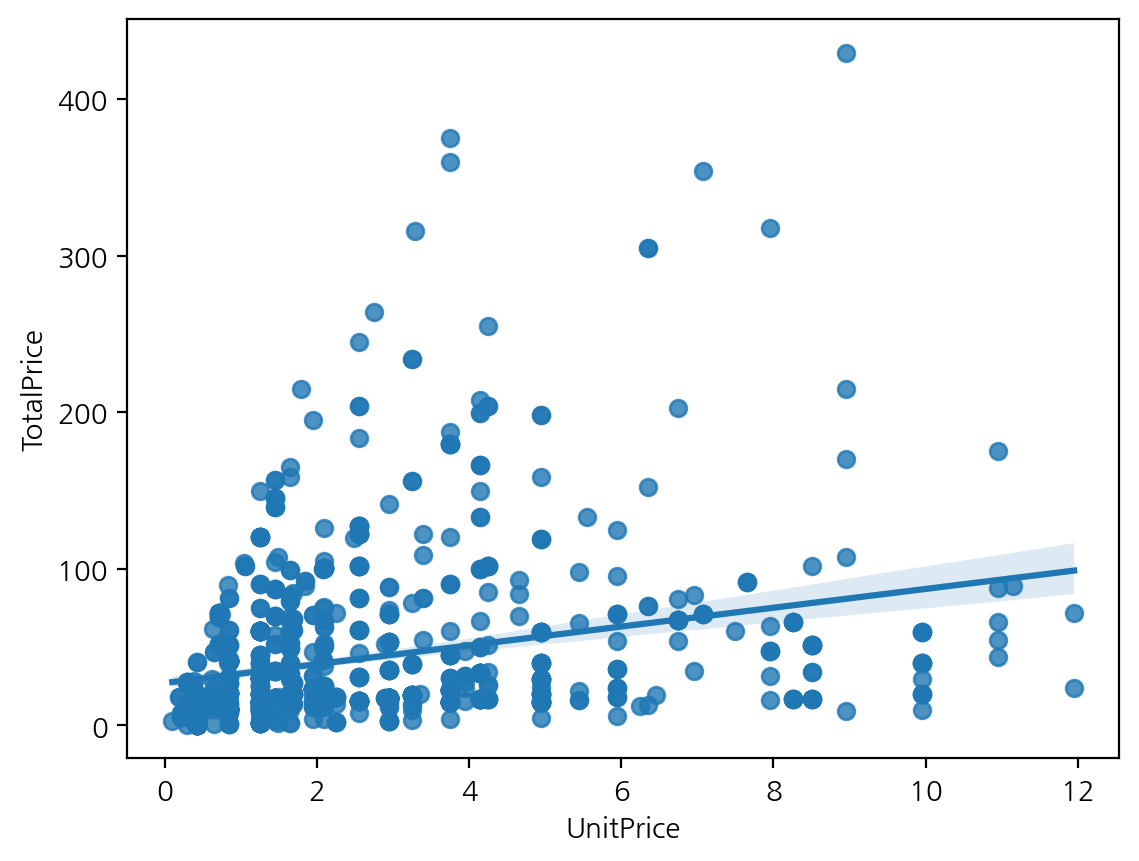

In [160]:
# 전체 변수 시각화3
sns.regplot(data=df_filtered, x="UnitPrice", y="TotalPrice")

In [145]:
# 전체 변수와 개별 변수를 합쳐서 시각화 하기
species_all = df_filtered.copy()
species_all["Country"] = "all"
df_all = pd.concat([species_all, df_filtered])
df_all["Country"].value_counts()

all          1140
Japan         295
Hong Kong     272
Singapore     212
USA           176
Canada        146
Lebanon        39
Name: Country, dtype: int64

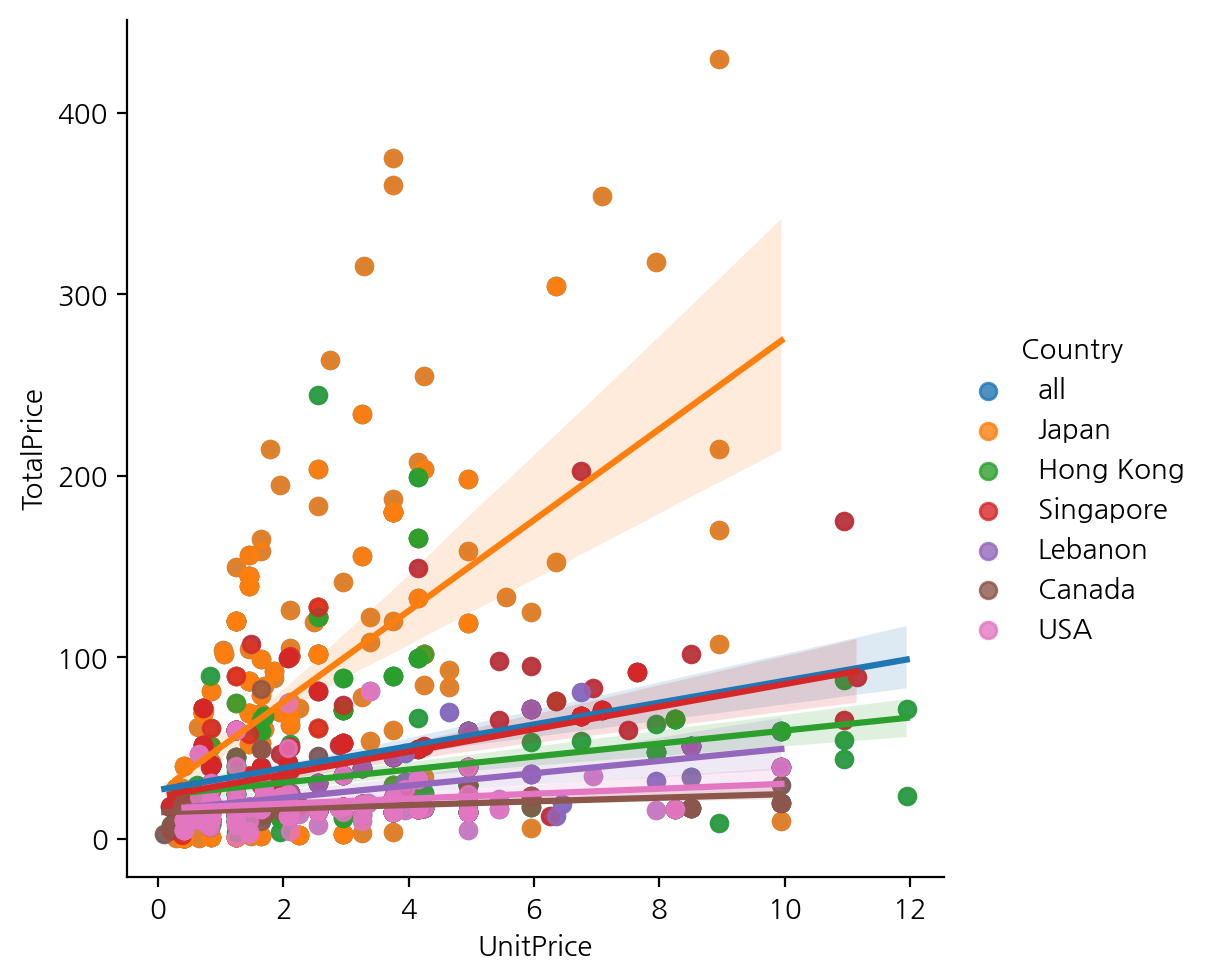

In [157]:
# 개별 변수의 회귀선 시각화
sns.lmplot(data=df_all, x="UnitPrice", y="TotalPrice", hue="Country")

심슨의 역설을 분석하기 어려운 것 같다. 국가별 TotalPrice와 UnitPrice의 상관관계는 전체 상관관계와 방향이 일치한다

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [153]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [163]:
model = sm.OLS(y, X).fit()


In [164]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        05:06:12   Log-Likelihood:            -3.7155e+06
No. Observations:              530098   AIC:                         7.431e+06
Df Residuals:                  530096   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0801      0.370     43.462      0.0

1. R-squared는 0.019로 TotalPrice를 1.9%만 설명한다는 뜻으로 단가 외에 다른 요소들이 총 판매액에 큰 영향을 미친다는 것을 의미
2. F-statistic은 1.019e+04, p-value는 0.000으로 통계적으로 유의미하다는 것을 의미 (그러나 R-squared가 낮다는 것을 고려)
3. 회귀 계수: 상수항 16.01은 UnitPrice와 상관없이 TotalPrice의 평균 값이 16.08
  UnitPrice 1.0344는 단가가 1달러 오를 때 약 4센트 오른다는 것을 의미.

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [165]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [167]:
df_promotion["IsChristmasProduct"].value_counts()

False    24556
True      1601
Name: IsChristmasProduct, dtype: int64

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# 다변량 회귀분석


## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

In [ ]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']
